# Fitting a resonator measured in reflection

In [1]:
from resonator_tools import circuit
import numpy as np
import pandas as pd
from IPython.display import display
%matplotlib inline

Although we could use the resonator tools to load data, here we want to use the Pandas library, which is used for statistical data analysis. It can handle many different file types including hdf5.

In [2]:
df = pd.read_csv('S11.txt',sep='\t')

Pandas has a very nice way of displaying the data. Let's look at the first few entries:

In [3]:
display(df.head())

,freq,mag,phase
0,7.112886e+09,-29.041420,40.656170
1,7.112886e+09,-29.042747,40.569664
2,7.112887e+09,-29.045673,40.464161
3,7.112887e+09,-29.049311,40.361294
4,7.112887e+09,-29.051012,40.265739


Next, we define a reflection port measurement and add the data.

In [4]:
port1 = circuit.reflection_port(f_data=df["freq"].values,
                                z_data_raw=10**(df["mag"].values/20.)*np.exp(1j*df["phase"].values/180.*np.pi))

Perform an automated fit.

In [5]:
port1.autofit()

Let's plot the data and the fit!

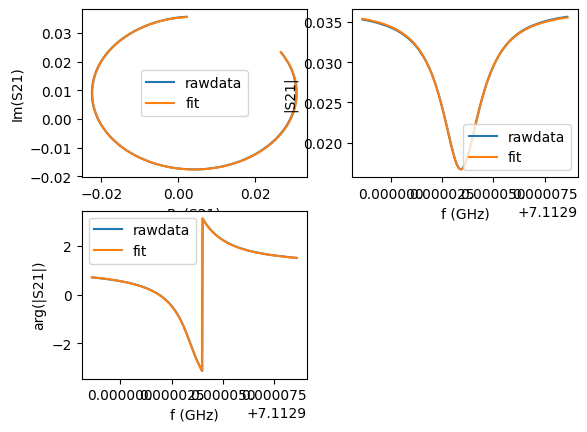

In [6]:
port1.plotall()

Next, let us have a look at the fit results. Here, we convert the dictionary of results into a dataframe to display it in a nicer way.

In [7]:
display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))

C:\Users\chhagen\AppData\Local\Temp\ipykernel_11844\1469808684.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  display(pd.DataFrame([port1.fitresults]).applymap(lambda x: "{0:.2e}".format(x)))


,Qi,Qc,Ql,fr,theta0,Ql_err,Qc_err,fr_err,chi_square,Qi_err
0,9.30e+05,3.48e+05,2.53e+05,7.11e+09,-4.21e-03,1.97e+02,2.47e+02,7.22e+00,2.88e-05,1.74e+03


Finally, we can calculate the single photon limit, i.e., the input power necessary to maintain one photon on average in the resonator:

In [9]:
print('Single photon limit: %.2f dBm' % port1.get_single_photon_limit())

Single photon limit: -155.44 dBm


Or, we can compute the photons in the resonator for a given power:

In [11]:
print('At -100dBm, we have %.2e photons in the resonator' % port1.get_photons_in_resonator(-100))

At -100dBm, we have 3.50e+05 photons in the resonator
